# EP1 - Agulha de Buffon

## Seção 1: Simulação da Agulha de Buffon

Vamos discutir o script utilizado na estimativa de $\pi$ por meio do método de Monte Carlo usando as agulhas de Buffon. No E-Disciplinas, foi incluso o arquivo `buffon.py` que contém este mesmo código, mas feito de tal forma que possa ser executado por si só. Ele possui comentários, também. Para utilizá-lo, basta executá-lo em sua máquina, inputar o número de iterações, e o script irá imprimir o valor estimado de $\pi$, o erro da simulação e o erro real, comparado com o valor do pacote `numpy` do Python. Esse código não possui semente fixa, mas isso pode ser mudado removendo o comentário de uma linha indicada.

Sobre a matemática da agulha de Buffon, podemos calcular a probabilidade $p$ analiticamente por meio da seguinte identidade:

$$p = \frac{2}{\pi}\frac{l}{L}$$

Onde $L$ é a distância entre as duas retas verticais e $l$ é o comprimento da agulha. Se fixarmos $L = 2l$, podemos rearranjar para calcular $\pi$ da seguinte forma:

$$\pi = \frac{1}{p}$$

Daí, podemos estimar $p$ simulando o lançamento da agulha e contanto quantas vezes há um acerto, isto é, quando a agulha cruza uma reta vertical. Daí, podemos calcular:

$$p \approx \frac{N_{\text{acertos}}}{N}$$

Então podemos partir para a simulação em si.

Primeiramente, vamos pegar algumas operações básicas do pacote `numpy` que serão utilizadas no código, incluindo o valor de $\pi$ e as funções para gerar números aleatórios.

In [2]:
from numpy.random import rand
from numpy.random import seed as set_seed
from numpy import pi, sqrt, cos

Agora definimos a classe `Agulha`. Ela possui as propriedades teóricas da agulha, sendo elas a posição horizontal do centro da agulha $x$, o ângulo com a horizontal $\theta$ e o comprimento da agulha $l$ - que tem valor padrão 1. Como no enunciado o plano é infinito, não faz diferença a posição vertical $y$. Além disso, o código suporta diferentes valores para $l$, apesar de não ser necessário para o EP.

Além disso, essa classe possui o método `checar`, que verifica se a agulha está atravessando uma das retas verticais ou não. Apesar do problema original levar em consideração um plano infinito com infinitas retas verticais paralelas, não precisamos considerar todo esse espaço; basta levar em consideração o espaço entre duas retas, uma de $x = 0$ e outra em $x= 2l$. O motivo para isso é simples: não faz diferença, em termos probabilísticos, exatamente onde no plano a agulha cai, mas sim a distância relativa entre ela e as retas verticais mais próximas. Então, podemos considerar um espaço finito, e o mais simples é considerar o espaço entre duas retas paralelas.

Daí entra o método `checar`: ele calcula a *"largura horizontal"* $s = \frac{l\cos(\theta)}{2}$ da agulha, depois verifica qual das duas retas é a mais próxima e determina a distância até ela, $b$, e então compara as duas distâncias. Se $s \geq b$, então a agulha cruza uma das retas. Caso contrário, ela não cruza.

Depois, foram definidas duas funções auxiliares, `jogada` e `calcula_pi`. A primeira função é bem simples, ela apenas gera uma agulha aleatória de $x \in [0, 2l)$ e $\theta \in [0, \frac{\pi}{2})$, com um $l$ de input, mas ele também tem um valor padrão de 1. O motivo de ser aberto é devido à definição da função `rand`, que tem intervalo fixo de $[0, 1)$.

Já a segunda função é mais complexa. Ela recebe o número de iterações desejadas $N$ e realiza um loop de $N$ iterações. Em cada iteração, ela gera uma agulha aleatória e, chamando o método `checar`, checa se ela cruza uma das retas verticais. Se sim, ela incrementa o número de acertos. No final, ela retorna o valor estimado de $\pi$, `pi_buffon`, o erro da simulação `sigma` e, comparando com o valor de $\pi$ do pacote `numpy`, calcula o erro real.

Para facilitar no processo de análise, precisamos garantir reprodutibilidade. Para tanto, a função `calcula_pi` possui outra entrada, o parâmetro `seed`, ou semente. Ele garante que os valores sempre serão os mesmos ao executar o programa com um dado $N$. Fixamos a semente como 1 por padrão, mas isso é arbitrário e pode ser mudado.

In [76]:
class Agulha:

    '''
    Aqui definimos as propriedades básicas da agulha: x, theta e l. Bem auto-explicativo, mas é relevante comentar que l possui um valor padrão de 1.
    '''

    def __init__(self, x, theta, l = 1):
        self.x = x
        self.theta = theta
        self.l = l

    '''
    Depois, definimos a função de checagem.
    '''

    def checar(self):

        # Primeiro extraímos as propriedades do objeto agulha:

        l = self.l
        theta = self.theta
        x = self.x

        # Depois calculamos L = 2l e fazemos a distância horizonal s.

        L = 2*l
        s = (l*cos(theta))/2

        '''
        Como as posições das retas sempre são x = 0 e x = L, podemos calcular
        a distância até elas fazendo L-x e x-0, mas só precisamos do menor, 
        então usamos a função min().
        '''

        b = min(x, L-x)

        # Finalmente checamos se cruza ou não

        if s >= b: 
            return True
        
        else:
            return False

"""
Aqui definimos a função que gera uma agulha aleatória.
Como a função rand() gera um número aleatório entre zero
e um, basta mutliplicarmos pelo limite que queremos para 
obter um valor aleatório no intervalo desejado.
"""

def jogada(l = 1):
    L = 2*l
    return Agulha(x = rand()*L, theta = rand()*(pi/2), l=l)


"""
Finalmente, definimos a função de cálculo de pi.
"""

def calcula_pi(N, seed = 1):
    N_acertos = 0
    
    set_seed(seed) # Aqui fixamos a seed inicial para o restante das jogadas aleatórias.

    for _ in range(N):
        agulha = jogada() # Jogamos uma agulha aleatória...

        if agulha.checar(): # Checamos se ela "acertou"...
            N_acertos += 1  # E, se sim, somamos ao número total de acertos.

    p = N_acertos/N # Finalmente, estimamos a probabilidade com a razão simples.

    pi_buffon = 1/p # Utilizamos ela para estimar pi.

    sigma = p/sqrt(N) # Depois usamos a definição dada em sala para calcular o erro da simulação.

    erro = abs(pi_buffon - pi) # E comparamos com o valor de pi do pacote numpy para determinar o erro real.

    return pi_buffon, sigma, erro # Finalmente, retornamos todos os valores em uma tupla.


Com o código finalizado, podemos passar para uma análise.

## Seção 2: Análise

### Preâmbulo

Para realizarmos a análise, vamos precisar de alguns pacotes a mais:

In [8]:
import numpy as np 
import timeit # Será usado para contar o tempo de execução.
import pandas as pd # Será usado para exportar os dados em .csv.

Agora, vamos definir alguns números de iterações para a análise. Após alguns testes, percebemos que a maior ordem de grandeza viável computacionalmente é $10^9$, que demorou em torno de 40 minutos. Acima disso, em $10^{10}$ por exemplo, demoraria mais de uma hora. Então, criamos a array `N_pot`, com as potências de 10 indo de 1 a 9:

In [77]:
N_pot = np.power(10,np.arange(1,10,1))
N_pot

array([        10,        100,       1000,      10000,     100000,
          1000000,   10000000,  100000000, 1000000000], dtype=int32)

Antes de começarmos os testes, precisamos mudar uma configuração do pacote `timeit`. A questão é que queremos, ao mesmo tempo, rodar a simulação extraindo os resultados e extrair o tempo de execução. Mas, a função `timeit.timeit()` não retorna os valores retornados pelo código que está testando por padrão, então precisamos mudar essa configuração, que pode ser feita com o seguinte código:

In [38]:
timeit.template = """
def inner(_it, _timer{init}):
    {setup}
    _t0 = _timer()
    for _i in _it:
        retval = {stmt}
    _t1 = _timer()
    return _t1 - _t0, retval
"""

Agora, basta montarmos um loop simples para iterar em cada valor de $N$ e extrair os resultados da simulação junto ao tempo de execução.

**[Nota: Não é necessário executar esta célula! Salvamos em .csv e vamos usar os dados salvos.]**

In [ ]:
resultados = []
for N in N_pot:
    resultados.append(
        timeit.timeit(
            'calcula_pi(N)',
            globals= globals(),
            number = 1))

Pronto. No entanto, a lista `resultados` tem como elementos tuplas, sendo elas estruturadas da seguinte maneira:

```python
(tempo, (pi_buffon, sigma, erro))
```

Então, será mais prático separá-las em duas listas, sendo elas `tempos` e `valores`:

In [ ]:
tempos = []
valores = []

for elemento in resultados:
    tempos.append(elemento[0])
    valores.append(elemento[1])

Agora, salvamos esses valores para não precisarmos executar o código novamente. Para isso, usamos o pacote `pandas`:

In [ ]:
pd.DataFrame(valores).to_csv('Valores')
pd.DataFrame(tempos).to_csv('Tempos')

Então, assumindo que já fizemos a simulação e salvamos os dados, vamos carregar os dados e transformá-los em uma array.

In [78]:
valores = pd.read_csv('Valores', index_col = 0)
tempos = pd.read_csv('Tempos', index_col = 0)

In [79]:
valores, tempos = np.array(valores), np.array(tempos['0'])

### Análise e Visualizações

#### Análise dos erros

Agora com os dados agregados, podemos iniciar uma análise para responder as perguntas propostas. Primeiro, vamos à análise dos erros. Para tanto, vamos preparar um gráfico.

In [83]:
import matplotlib.pyplot as plt

Podemos organizar um gráfico legível colocando os valores de $N$ em $\log_{10}$.

Text(0, 0.5, 'Erro')

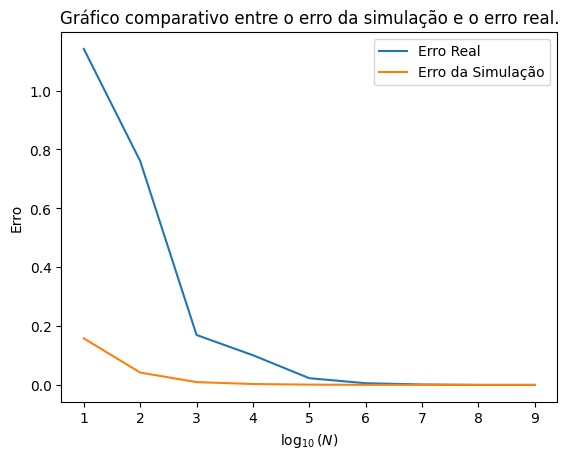

In [90]:
plt.plot(np.log10(N_pot), np.array(valores)[:,2],label='Erro Real')
plt.plot(np.log10(N_pot), np.array(valores)[:,1],label='Erro da Simulação')
plt.title('Gráfico comparativo entre o erro da simulação e o erro real.')
plt.legend()
plt.xlabel(r'$\log_{10}(N)$')
plt.ylabel('Erro')

Ao analisarmos o gráfico, podemos perceber que ambos os erros tendem a convergir no zero, o que é esperado. Além disso, o erro real tende a convergir mais rápido que o erro da simulação, mas ao mesmo tempo começa num valor muito mais divergente que o erro da simulação. Isso é esperado, pois a simulação é muito ineficiente para calcular $\pi$, então se espera uma variação inicial maior para o erro real e menos para o erro da simulação, já que este é apenas uma medida estatística. Como o erro da simulação é menor, isso indica que ela é precisa, apesar da convergência lenta.

#### Análise do tempo de execução

Agora, queremos estimar quanto tempo demorará para conseguir uma precisão de 14 dígitos. Para isso, queremos que o erro da simulação seja da ordem de $10^{-15}$. Então, vamos fazer alguns ajustes com ajuda do pacote `scipy.optimize`.

In [20]:
import scipy.optimize as scp

Primeiro, vamos ver o gráfico do tempo de execução em função de $N$.

Text(0, 0.5, 'Tempo (s)')

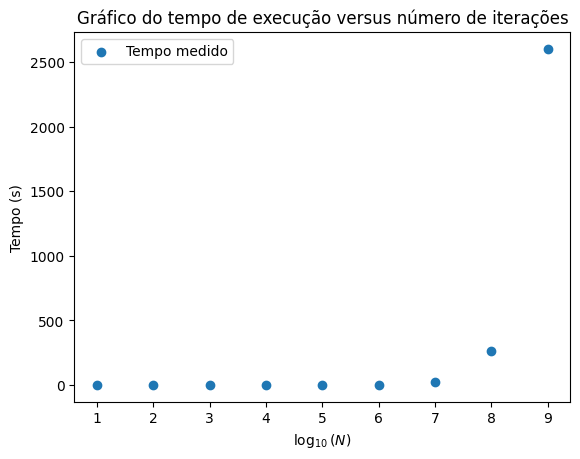

In [104]:
plt.scatter(np.log10(N_pot), tempos,label=r'Tempo medido')
plt.legend()
plt.title('Gráfico do tempo de execução versus número de iterações')
plt.xlabel(r'$\log_{10}(N)$')
plt.ylabel(r'Tempo (s)')

Observamos uma variação brusca no tempo de execução que sugere uma relação exponencial. Se é o caso, sendo o tempo de execução $t$ e o número de iterações $N$, podemos escrever:

$$t = b\cdot N^a$$

Sendo $a$ e $b$ parâmetros a descobrir. Se isso é o caso, podemos escrever:

$$\log(t) = a\log(N) + \log(b)$$

Então, podemos realizar um ajuste linear. Vamos fazê-lo:

In [105]:
func = lambda x, a, b: a*x + b # Função linear de ajuste.

In [44]:
fit, cov = scp.curve_fit(func, np.log10(N_pot),np.log10(tempos))

In [45]:
x_space = np.linspace(0, np.log10(N_pot)[-1], 1000)

Com isso podemos plotar:

Text(0, 0.5, 'Tempo ($log_{10}(s)$)')

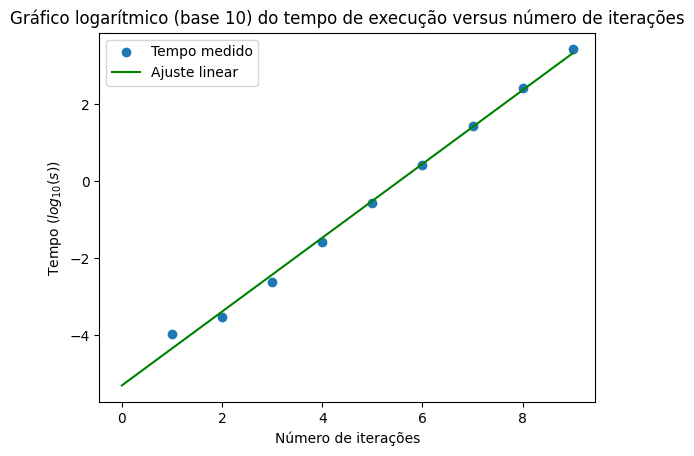

In [101]:
plt.scatter(np.log10(N_pot), np.log10(tempos),label=r'Tempo medido')
plt.plot(x_space, func(x_space,fit[0], fit[1]), c='green',label='Ajuste linear')
plt.legend()
plt.title('Gráfico logarítmico (base 10) do tempo de execução versus número de iterações')
plt.xlabel('Número de iterações')
plt.ylabel(r'Tempo ($log_{10}(s)$)')

Como podemos ver, o gráfico é linear, então nossa suposição de usar um modelo exponencial era válida. Agora, fazemos o mesmo para o erro, que também deve ser exponencial - isso é feito pelo mesmo argumento, não repetiremos por brevidade.

In [106]:
fit1, cov1 = scp.curve_fit(func, np.log10(N_pot),np.log10(np.array(valores)[:,2]))

In [107]:
fit1

array([-0.56141884,  0.95597189])

Text(0.5, 0, 'Número de iterações')

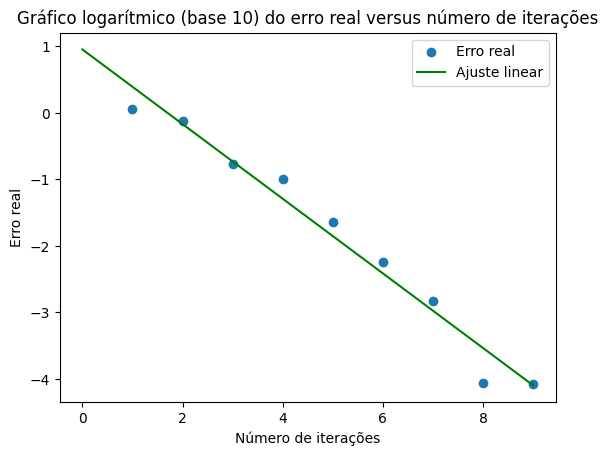

In [108]:
plt.scatter(np.log10(N_pot), np.log10(np.array(valores)[:,2]),label='Erro real')
plt.plot(x_space, func(x_space,fit1[0],fit1[1]), c='green',label='Ajuste linear')
plt.legend()
plt.title('Gráfico logarítmico (base 10) do erro real versus número de iterações')
plt.ylabel('Erro real')
plt.xlabel('Número de iterações')


Como podemos ver, o erro também é exponencial e cai com o número de iterações. Então, queremos que o erro seja da ordem de $10^{-15}$, então podemos calcular o número de iterações necessário para isso:

In [115]:
N_alvo = 10**((-15 - fit1[1])/fit1[0])
N_alvo

2.6351099537763767e+28

Então, precisamos de $~2.63\cdot 10^{28}$ iterações. Utilizando ele na função exponencial, temos:

In [116]:
tempo_total = (10**fit[1])*N_alvo**fit[0]
tempo_total

8.145680296419222e+21

Isso é um número absurdo! São $8.14$ sextilhões de segundos! Colocando em perspectiva, vamos comparar com a idade do universo, que é $~13.787$ bilhões de anos:

In [117]:
idade_universo = 13.787*10**9*(365*24*60*6)

In [118]:
tempo_total/idade_universo

187348.82698607628

Ou seja, são $~187$ mil idades do universo! 